In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#Loading csvin python 
df = pd.read_csv(r"C:\Users\gajan\anaconda_projects\python\Titanic.csv")   


In [4]:
#View the first few rows of the dataset.
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
#Checking Number of Row and Columns
print(df.shape)

(891, 12)


Dataset has 891 passengers and 12 features.

In [6]:
# Check what columns are in the dataset
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
# Check the data type of each column
print(df.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


A DataFrame has three types of data: Integer, Float, and Object

In [8]:
# Check missing values in each column
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age has 177 (20%) missing, Cabin  687 (77%), and Embarked has only 2 missing values (0.2%).

In [9]:
# Get summary statistics of numeric columns
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Separate numeric and categorical columns
numaric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("Numeric Columns:", numaric_cols)
print("Categorical Columns:", categorical_cols)


Numeric Columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


Survivors vs Non-Survivors:
Survived
0    549
1    342
Name: count, dtype: int64

Percentage:
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


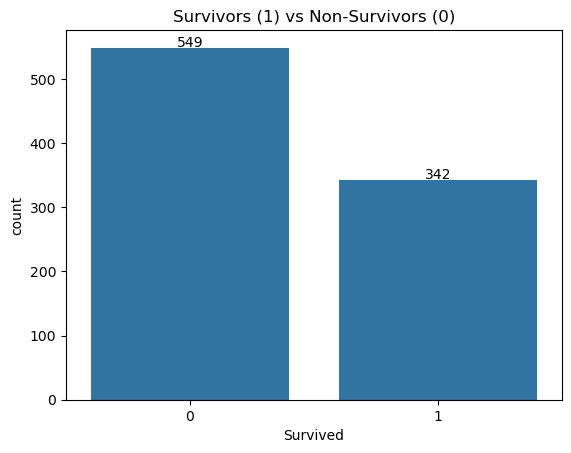

In [11]:


# Count and visualize survivors vs non-survivors

print("Survivors vs Non-Survivors:")
print(df['Survived'].value_counts())  

print("\nPercentage:")
print(df['Survived'].value_counts(normalize=True) * 100)  

ax = sns.countplot(x='Survived', data=df)
plt.title("Survivors (1) vs Non-Survivors (0)")

# Add counts on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2.,  
            p.get_height() + 2,              
            int(p.get_height()),             
            ha="center", fontsize=10)

plt.show()


There are 549 people who did not survive (about 62 percent) and 342 people who survived (about 38 percent).

Passenger Distribution by Gender
Sex
male      577
female    314
Name: count, dtype: int64


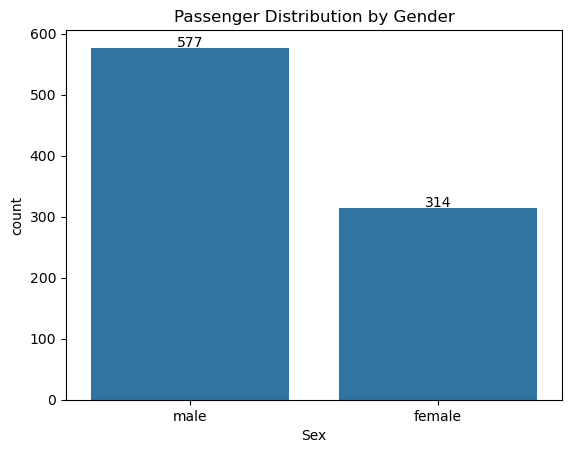

In [12]:
# Passenger distribution by gender

print("Passenger Distribution by Gender")
print(df["Sex"].value_counts())

ax = sns.countplot(x="Sex", data=df)
plt.title("Passenger Distribution by Gender")

# Add counts on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2.,   
            p.get_height() + 2,              
            int(p.get_height()),             
            ha="center", fontsize=10)


There are 577 male passengers (about 65 percent) and 314 female passengers (about 35 percent).

Passenger Distribution by Class:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


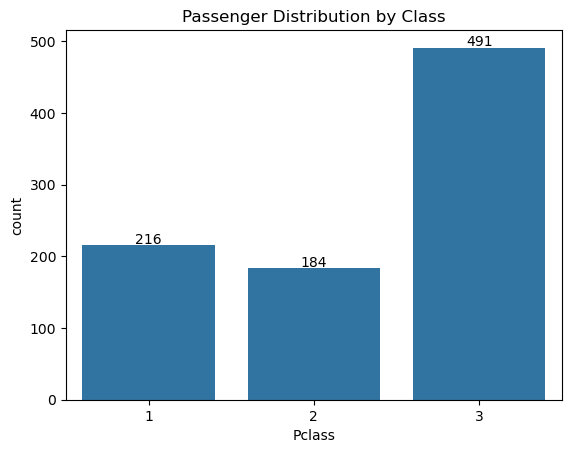

In [13]:
# Passenger distribution by class

print("Passenger Distribution by Class:")
print(df["Pclass"].value_counts())

ax = sns.countplot(x="Pclass", data=df)
plt.title("Passenger Distribution by Class")

# Add counts on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2.,  
            p.get_height() + 2,              
            int(p.get_height()),             
            ha="center", fontsize=10)
plt.show()


There are 491 passengers in 3rd class (about 55 percent), 216 in 1st class (about 24 percent), and 184 in 2nd class (about 21 percent).

Passenger Distribution by Embarked
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


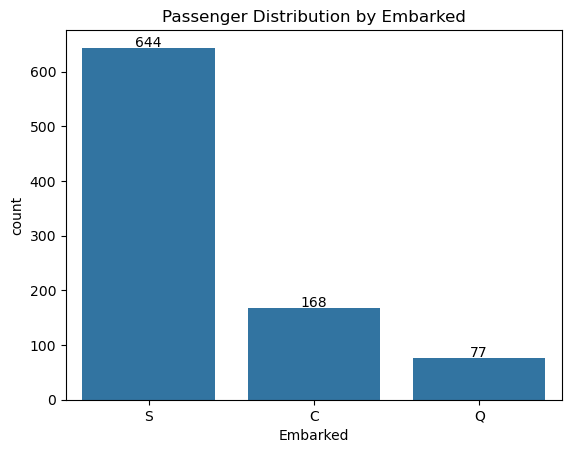

In [14]:
# Passenger distribution by Embarked port

print("Passenger Distribution by Embarked")
print(df["Embarked"].value_counts())

ax = sns.countplot(x="Embarked", data=df)
plt.title("Passenger Distribution by Embarked")

# Add counts on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2.,   
            p.get_height() + 2,             
            int(p.get_height()),            
            ha="center", fontsize=10)
plt.show()


There are 644 passengers who embarked at Southampton (about 72 percent), 168 at Cherbourg (about 19 percent), and 77 at Queenstown (about 9 percent).

In [15]:
# Fill missing values in Age and Embarked

# Fill Age missing values with median
df["Age"] = df["Age"].fillna(df["Age"].median())

# Fill Embarked missing values with mode or default 'S' if empty
if not df["Embarked"].mode().empty:
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
else:
    df["Embarked"] = df["Embarked"].fillna("S")  # default value

# Display updated columns
print(df["Age"])
print(df["Embarked"])


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64
0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object


For Age, I filled the missing values with the average age, and for Embarked, I filled the missing values with the most common port.

In [16]:
# Drop the Cabin column due to many missing values
df = df.drop(columns=["Cabin"])


I removed the Cabin column because most values were missing

In [17]:

# Encode categorical columns to numeric

# Encode Sex: male=0, female=1
df["Sex"] = df["Sex"].astype(str).str.strip().str.lower()
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# Encode Embarked: C=0, Q=1, S=2
df["Embarked"] = df["Embarked"].astype(str).str.strip().str.upper()
df["Embarked"] = df["Embarked"].map({"C": 0, "Q": 1, "S": 2})

# Check unique values after encoding
print(df["Sex"].unique())
print(df["Embarked"].unique())



[0 1]
[2 0 1]


I changed the Sex column to numbers: 0 for male and 1 for female. I also changed the Embarked column to numbers: 0 for Cherbourg, 1 for Queenstown, and 2 for Southampton.

In [18]:
# Create a new feature 'FamilySize' = SibSp + Parch + 1 (self)
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# Display the new column
print(df["FamilySize"])


0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64


I combined SibSp and PArch into a new column called Family Size.

In [19]:
# Create a new feature 'IsAlone': 1 if passenger is alone, 0 otherwise
df["IsAlone"] = 0
df.loc[df["FamilySize"] == 1, "IsAlone"] = 1

# Display the new column
print(df["IsAlone"])

    

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: IsAlone, Length: 891, dtype: int64


If the passenger is alone, it shows 1. If the passenger has family, it shows 0.

In [20]:
# Extract title from Name and simplify rare titles
df["Title"] = df["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)

# Replace rare titles with 'Rare'
df["Title"] = df["Title"].replace(
    ["Lady", "Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev", 
     "Sir", "Jonkheer", "Dona"], "Rare"
)

# Standardize some titles
df["Title"] = df["Title"].replace({"Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs"})

# Display the Title column
print(df["Title"])


0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886    Rare
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object


The passengers have titles such as Mr, Mrs, Miss, and some rare titles grouped as Rare.

In [21]:
# Create AgeGroup feature by binning Age
df["AgeGroup"] = pd.cut(
    df["Age"],
    bins=[0, 12, 18, 60, 100],
    labels=["Child", "Teen", "Adult", "Senior"]
)

# Display the AgeGroup column
print(df["AgeGroup"])


0      Adult
1      Adult
2      Adult
3      Adult
4      Adult
       ...  
886    Adult
887    Adult
888    Adult
889    Adult
890    Adult
Name: AgeGroup, Length: 891, dtype: category
Categories (4, object): ['Child' < 'Teen' < 'Adult' < 'Senior']


Most passengers are categorized as Adults, with other age groups being Child, Teen, and Senior.

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64


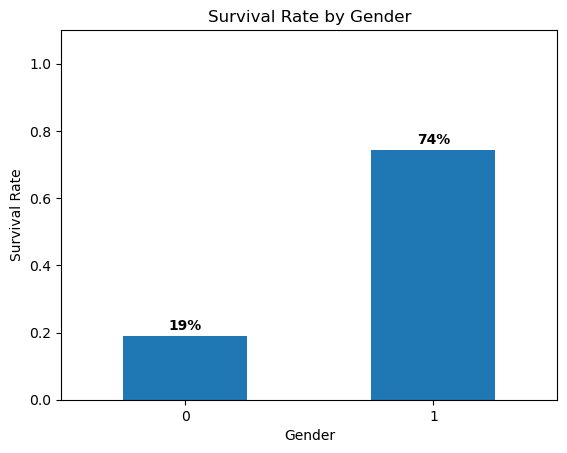

In [22]:
# Calculate survival rate by gender
survival_by_gender = df.groupby("Sex")["Survived"].mean()
print(survival_by_gender)

# Plot survival rate by gender
ax = survival_by_gender.plot(
    kind="bar",
    title="Survival Rate by Gender", 
    ylabel="Survival Rate", 
    xlabel="Gender",
    rot=0
)

# Add percentage labels on top of bars
for p in ax.patches:
    height = p.get_height()  # fraction 0-1
    ax.text(p.get_x() + p.get_width() / 2,     
            height + 0.02,            
            f"{height*100:.0f}%",    # convert to percentage
            ha='center', fontsize=10, weight='bold')

plt.ylim(0, 1.1)  
plt.show()




The survival rate is about 19 percent for males (0) and 74 percent for females (1).

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: IsAlone, Length: 891, dtype: int64


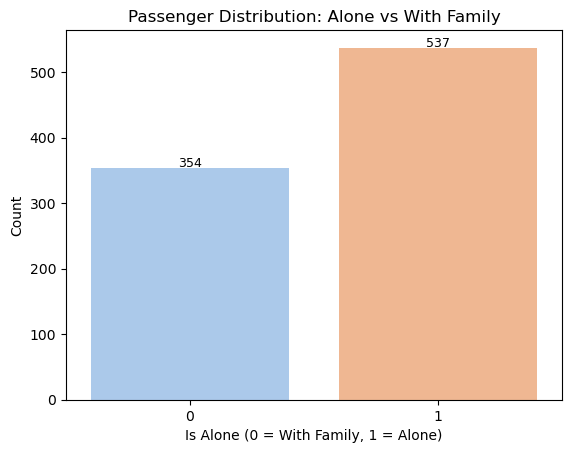

In [23]:
# Create a new feature 'IsAlone': 1 if passenger is alone, 0 otherwise
df["IsAlone"] = 0
df.loc[df["FamilySize"] == 1, "IsAlone"] = 1

# Display the new column
print(df["IsAlone"])

# Visualize IsAlone distribution without FutureWarning
ax = sns.countplot(x="IsAlone", hue="IsAlone", data=df, legend=False, palette="pastel")
plt.title("Passenger Distribution: Alone vs With Family")
plt.xlabel("Is Alone (0 = With Family, 1 = Alone)")
plt.ylabel("Count")

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2, int(height), ha="center", fontsize=9)

plt.show()


There are 537 passengers who were alone (about 60 percent) and 354 passengers who were with family (about 40 percent).

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64


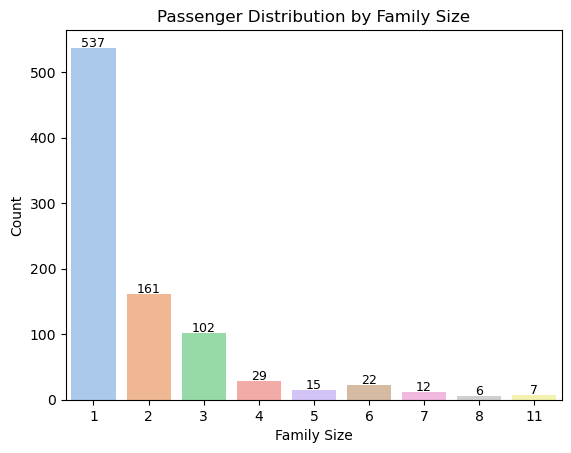

In [24]:
# Create a new feature 'FamilySize' = SibSp + Parch + 1 (self)
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# Display the new column
print(df["FamilySize"])

ax = sns.countplot(x="FamilySize", hue="FamilySize", data=df, legend=False, palette="pastel")
plt.title("Passenger Distribution by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Count")

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2, int(height), ha="center", fontsize=9)

plt.show()


There are 537 passengers who are alone, 161 passengers in 2-people families, and only 6 Passengers have 8 peoples this is less in all family size

survival_by_class
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


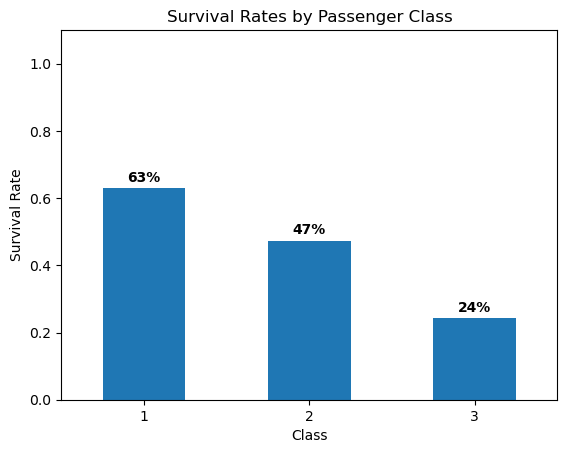

In [25]:
# Calculate survival rate by passenger class
survival_by_class = df.groupby("Pclass")["Survived"].mean()
print("survival_by_class")
print(survival_by_class)

# Plot survival rate by class
ax = survival_by_class.plot(
    kind="bar", 
    title="Survival Rates by Passenger Class",
    ylabel="Survival Rate",
    xlabel="Class",
    rot=0
)

# Add data labels on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,     
            p.get_height() + 0.02,            
            f"{p.get_height() * 100:.0f}%",   
            ha='center', fontsize=10, weight='bold')

plt.ylim(0, 1.1)  
plt.show()


1st class passengers have the highest survival rate (63%), and 3rd class passengers have the lowest survival rate (24%).

survival_by_agegroup
AgeGroup
Child     0.579710
Teen      0.428571
Adult     0.365753
Senior    0.227273
Name: Survived, dtype: float64


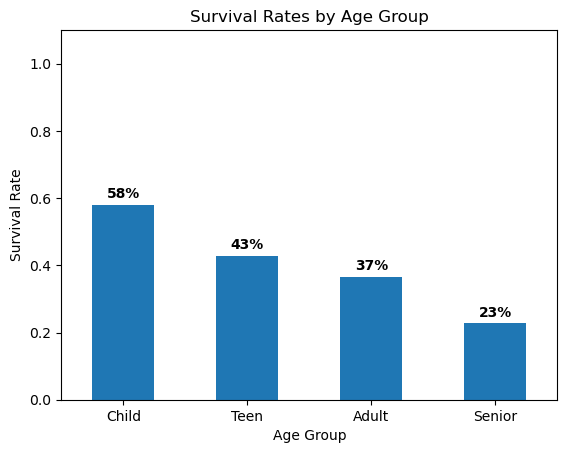

In [26]:
survival_by_agegroup = df.groupby("AgeGroup", observed=True)["Survived"].mean()
print("survival_by_agegroup")
print(survival_by_agegroup)

# Plot
ax = survival_by_agegroup.plot(kind="bar", 
                               title="Survival Rates by Age Group",
                               ylabel="Survival Rate",
                               xlabel="Age Group",
                               rot=0)

# Add data labels as percentages
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,    
            p.get_height() + 0.02,           
            f"{p.get_height() * 100:.0f}%",  # show as percentage
            ha='center', fontsize=10, weight='bold')

plt.ylim(0, 1.1)  # leave space for labels
plt.show()


Children have the highest survival rate (58%), and seniors have the lowest survival rate (23%)

gender_pivot
Pclass         1         2         3
Sex                                 
0       0.368852  0.157407  0.135447
1       0.968085  0.921053  0.500000


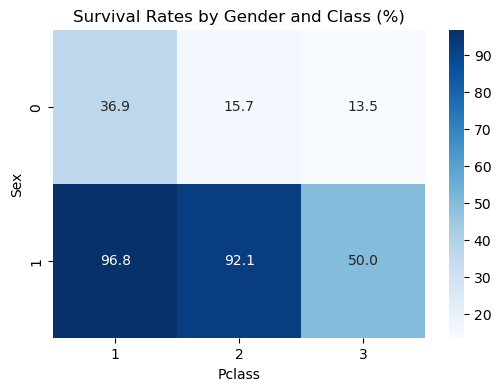

In [27]:
# Create pivot table of survival rates by Gender and Passenger Class
gender_pivot = pd.pivot_table(df, values="Survived", index="Sex", columns="Pclass")
print("gender_pivot")
print(gender_pivot)

# Convert to percentages for heatmap
gender_pivot_percent = gender_pivot * 100

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(gender_pivot_percent, annot=True, cmap="Blues", fmt=".1f")
plt.title("Survival Rates by Gender and Class (%)")
plt.ylabel("Sex")
plt.xlabel("Pclass")
plt.show()


Males survived less: 1st class 37%, 2nd class 16%, 3rd class 14%.
Females survived much more: 1st class 97%, 2nd class 92%, 3rd class 50%.

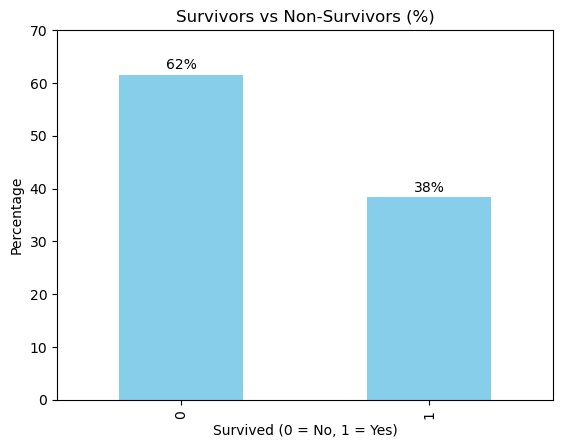

In [28]:

# Calculate percentages
survived_perc = df['Survived'].value_counts(normalize=True) * 100

# Plot as bar chart
ax = survived_perc.plot(kind="bar", color="skyblue")
plt.title('Survivors vs Non-Survivors (%)')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Percentage')

# Add percentage labels on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., 
            p.get_height() + 1,  
            f"{p.get_height():.0f}%", 
            ha="center")

plt.ylim(0, 70)  
plt.show()


62% of people did not survive, and 38% of people survived.

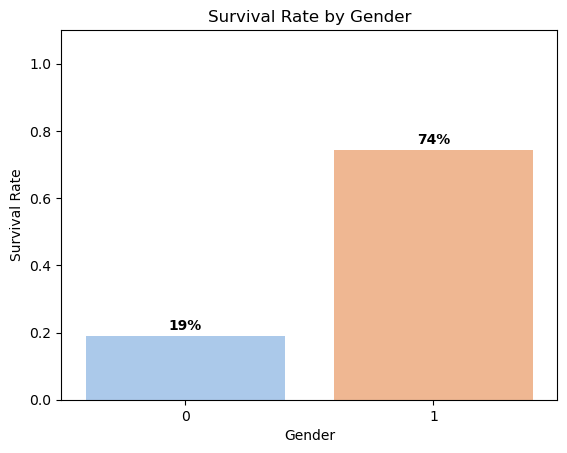

In [29]:



# Bar plot of Survival Rate by Gender with percentage labels
ax = sns.barplot(x="Sex", y="Survived", hue="Sex", data=df, errorbar=None, palette="pastel", legend=False)

plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")

# Add percentage labels on top of bars
for p in ax.patches:
    height = p.get_height()  
    ax.text(p.get_x() + p.get_width()/2., 
            height + 0.02,           
            f'{height*100:.0f}%',    
            ha="center", fontsize=10, weight="bold")

plt.ylim(0, 1.1)  
plt.show()


19% of males survived, and 74% of females survived

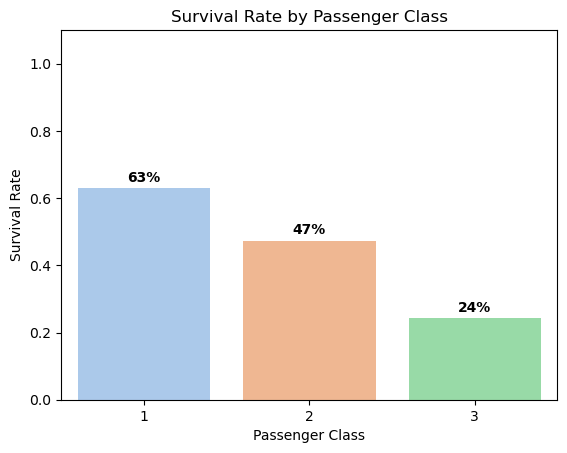

In [30]:

# Bar plot of Survival Rate by Passenger Class with percentage labels
ax = sns.barplot(x="Pclass", y="Survived", hue="Pclass", data=df, errorbar=None, palette="pastel", legend=False)

plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")

# Add survival rate as percentage on top of bars
for p in ax.patches:
    height = p.get_height()  # fraction 0-1
    ax.text(p.get_x() + p.get_width()/2, 
            height + 0.02,            # small vertical offset
            f'{height*100:.0f}%',     # convert fraction to percentage
            ha="center", fontsize=10, weight="bold")

plt.ylim(0, 1.1)  # leave space for labels
plt.show()


63% of passengers from 1st class survived, 47% from 2nd class survived, and 24% from 3rd class survived.

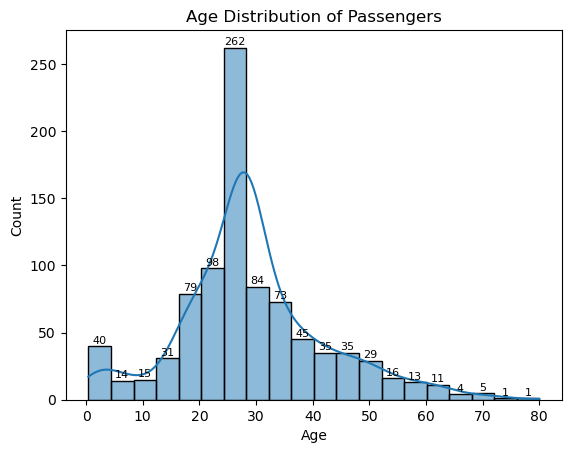

In [31]:


# Histogram of Age Distribution with data labels
ax = sns.histplot(df["Age"], bins=20, kde=True)

plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, 
                height + 2, 
                int(height), 
                ha="center", fontsize=8)

plt.show()


Most passengers were young adults (mean 29.7, median 28, range 0.42–80, with 50% between 20 and 38), while children and seniors were fewer.

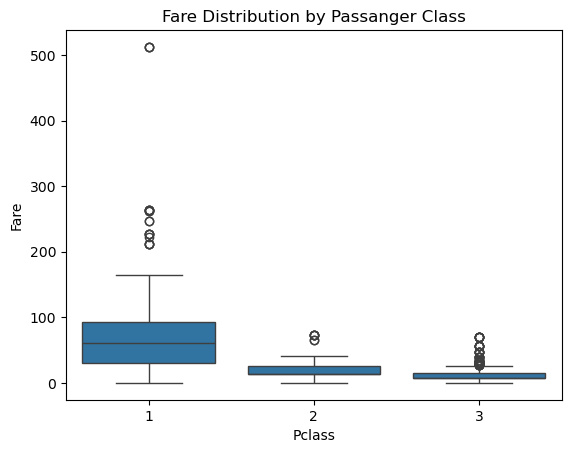

In [32]:
#Fare vs Class
sns.boxplot(x = "Pclass", y = "Fare", data = df)
plt.title("Fare Distribution by Passanger Class")
plt.show()



First-class passengers paid the highest fares (median 60, mean 84, up to 512), compared with 15 in second class and 8 in third class, showing that fares rose sharply by class—about seven times higher in first class than in third.

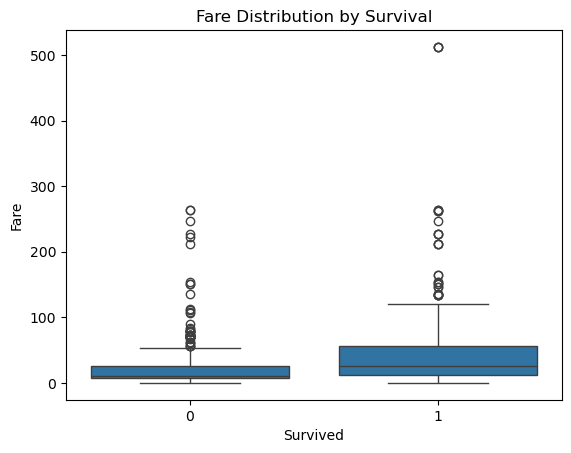

In [35]:
#Fare vs Surival
sns.boxplot(x = "Survived", y = "Fare", data = df)
plt.title("Fare Distribution by Survival")
plt.show()


Survivors paid higher fares (median 26, mean 48) compared with non-survivors (median 10, mean 22), indicating that economic status was linked to survival.

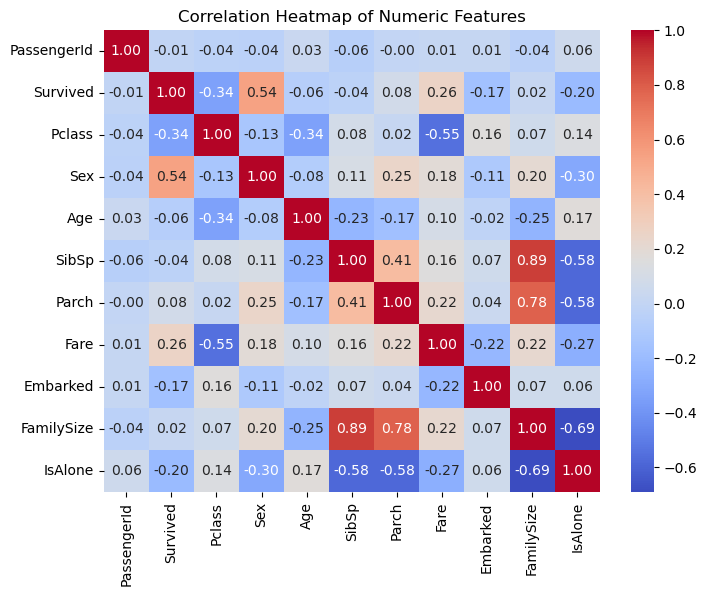

In [33]:
# Correlation heatmap of numeric features
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Sex and class had the strongest relationship with survival (Survived vs Sex: –0.54, Survived vs Pclass: –0.34), while higher fares were positively associated (Survived vs Fare: +0.26) and older age slightly lowered survival (Survived vs Age: –0.08); families also tended to travel together (SibSp vs Parch: +0.41).

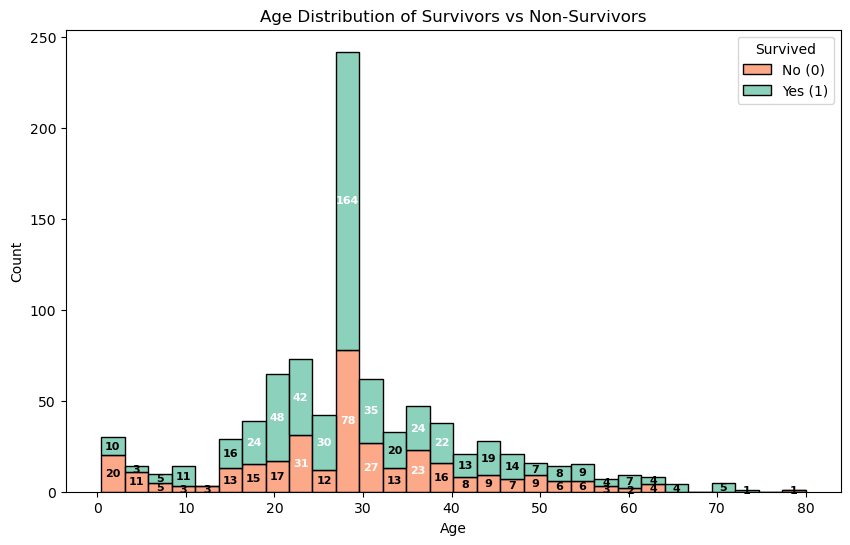

In [37]:


# Stacked histogram of Age Distribution by Survival
plt.figure(figsize=(10,6))

ax = sns.histplot(
    data=df, 
    x="Age", 
    hue="Survived", 
    bins=30, 
    kde=False, 
    palette="Set2", 
    multiple="stack"
)

plt.title("Age Distribution of Survivors vs Non-Survivors")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No (0)", "Yes (1)"])

# Add labels to stacked bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        y_pos = p.get_y() + height / 2  # Center label inside segment
        color = "white" if height > 20 else "black"
        ax.text(
            p.get_x() + p.get_width()/2, 
            y_pos, 
            int(height), 
            ha="center", va="center", 
            fontsize=8, fontweight="bold", color=color
        )

plt.show()









Survivors had a median age of 27, peaking around 20–35, while non-survivors had a median of 28, peaking 20–40; children under 12 had 58% survival, and seniors 50+ had 23%, showing highest survival among young children and slightly better outcomes for younger adults.